In [1]:
import numpy as np
from keras.datasets import mnist #手写数字[0，1，2，3，4，5，6，7，8，9]识别
from keras.models import Sequential,Model
from keras.layers.core import Dense,Activation,Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as processimage

Using TensorFlow backend.


In [2]:
#拉取原始数据
(x_train,Y_train),(x_test,Y_test)=mnist.load_data()

In [3]:
print(x_train.shape,Y_train.shape)
print(x_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
x_train.shape[1]

28

In [5]:
#数据准备
##reshape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

##设置成浮点型
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#因为色数为255
x_train=x_train/255
x_test/=255

In [6]:
print(x_train[9999])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
#基本参数设置
batch_size=1024
nb_class=10
nb_epochs=8

In [8]:
#label向量化
Y_train=np_utils.to_categorical(Y_train,nb_class)
Y_test=np_utils.to_categorical(Y_test,nb_class)

In [9]:
print(Y_train[9999])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
#设置网络结构
model=Sequential()
#第一层
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#第二层
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#最后一层
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
#编译
model.compile(
    loss='categorical_crossentropy'
    ,optimizer='rmsprop'
    ,metrics=['accuracy'],

)

In [12]:
#启动网络训练
Trainning=model.fit(
    x_train,Y_train,
    batch_size=batch_size,
    epochs=nb_epochs,
    validation_data=(x_test,Y_test)
    
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 2s 29us/step - loss: 0.5333 - accuracy: 0.8331 - val_loss: 0.2699 - val_accuracy: 0.9108
Epoch 2/8
60000/60000 [==============================] - 2s 27us/step - loss: 0.2143 - accuracy: 0.9361 - val_loss: 0.1464 - val_accuracy: 0.9525
Epoch 3/8
60000/60000 [==============================] - 2s 27us/step - loss: 0.1474 - accuracy: 0.9550 - val_loss: 0.1097 - val_accuracy: 0.9663
Epoch 4/8
60000/60000 [==============================] - 2s 28us/step - loss: 0.1117 - accuracy: 0.9657 - val_loss: 0.0873 - val_accuracy: 0.9729
Epoch 5/8
60000/60000 [==============================] - 2s 27us/step - loss: 0.0867 - accuracy: 0.9729 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 6/8
60000/60000 [==============================] - 2s 27us/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 7/8
60000/60000 [==============================] - 2s 29us/step - lo

In [13]:
Trainning.history

{'val_loss': [0.2699217890739441,
  0.14637744402885436,
  0.10967988011837006,
  0.08732540878057479,
  0.0846390772819519,
  0.07823796194791793,
  0.07032975733280182,
  0.07786126846075057],
 'val_accuracy': [0.9107999801635742,
  0.9524999856948853,
  0.9663000106811523,
  0.9728999733924866,
  0.9728999733924866,
  0.9761000275611877,
  0.9783999919891357,
  0.975600004196167],
 'loss': [0.5332682197252909,
  0.21426264756520588,
  0.14737733550866444,
  0.11168141119877498,
  0.0867111652970314,
  0.06975460165540377,
  0.058098047395547234,
  0.04778957475423813],
 'accuracy': [0.83308333,
  0.9361,
  0.95496666,
  0.96571666,
  0.97285,
  0.9788167,
  0.98181665,
  0.9848]}

In [14]:
Trainning.params

{'batch_size': 1024,
 'epochs': 8,
 'steps': None,
 'samples': 60000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

label:->> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
预测结果 [[5.0282620e-07 2.6318432e-06 9.9968719e-01 3.4690125e-05 3.6419831e-07
  2.0399108e-07 4.5556344e-08 1.2594782e-04 1.4824040e-04 2.4818269e-07]]
[2]


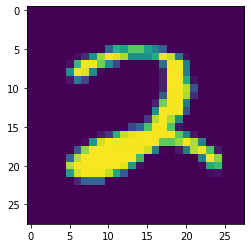

In [15]:
#样本内测试
testrun=x_test[888].reshape(1,784)
test_label=Y_test[888]
print('label:->>',test_label)
plt.imshow(testrun.reshape([28,28]))
pred=model.predict(testrun)
print("预测结果",pred)
b=[i.argmax()for i in pred]
print(b)